# CIFAR10 example

![](http://pytorch.org/tutorials/_images/mnist.png)From: http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html

### Training procedure

A typical training procedure for a neural network is as follows:

* **Define** the neural network that has some learnable parameters (or weights)
* **Iterate** over a dataset of inputs
* **Process** input through the network
* Compute the **loss** (how far is the output from being correct)
* **Propagate gradients** back into the network’s parameters
* **Update the weights** of the network, typically using a simple update rule: `weight = weight - learning_rate * gradient`

----

On CNN:

* `open $HOME/code/miku/deeplearningpython`, 3_3_conv2d_1.png ...
* http://cs231n.github.io/assets/cnn/convnet.jpeg

In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import torch.optim as optim

### Preprocess input images

> The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


### Display some training examples

 bird   car   cat horse


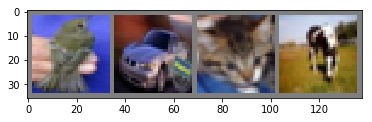

In [6]:
def imshow(img):
    """ Show image. """
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Define the network

In [7]:
# Define a network.

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d (3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


### Loss function

Cross-entropy measures loss for category predictions.

```
def CrossEntropy(yHat, y):
    if yHat == 1:
      return -log(y)
    else:
      return -log(1 - y)
```

Stochastic gradient descent is a fast variant of gradient descent.

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


### Training the network

In [9]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # backprop and weight update
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]

        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.213
[1,  4000] loss: 1.882
[1,  6000] loss: 1.688
[1,  8000] loss: 1.607
[1, 10000] loss: 1.559
[1, 12000] loss: 1.526
[2,  2000] loss: 1.439
[2,  4000] loss: 1.409
[2,  6000] loss: 1.357
[2,  8000] loss: 1.337
[2, 10000] loss: 1.338
[2, 12000] loss: 1.325
Finished Training


### Testing the network

In [10]:
dataiter = iter(testloader)

GroundTruth:    dog horse truck  ship


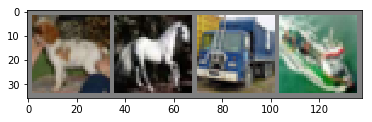

In [23]:
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

What does the network thinks this is?

In [25]:
', '.join(classes)

'plane, car, bird, cat, deer, dog, frog, horse, ship, truck'

In [26]:
outputs = net(Variable(images))

In [27]:
outputs

Variable containing:
-2.3723 -3.0047  0.6075  2.7019  1.1711  3.8046 -0.1477  1.3699 -0.6444 -3.3742
-0.2240  0.4190  1.2970  0.7141  0.7783  1.9582 -3.2241  8.3902 -5.9418 -1.9943
 0.9329  2.2344  0.3596 -0.0819 -1.9400 -1.4517 -1.6281 -1.0280  0.3643  2.6774
 0.8027 -0.9880  0.4889  0.6371  0.2861 -0.0372  0.0780 -1.1162  1.2526 -0.9091
[torch.FloatTensor of size 4x10]

In [29]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


Predicted:    dog horse truck  ship


### Accuracy for the whole dataset?

In [30]:
correct = 0
total = 0

for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

# Accuracy of the network on the 10000 test images: 56 %

Accuracy of the network on the 10000 test images: 54 %
